# Machine Learning Glossary
The purpose of this notebook is to provide a glossary of Machine Learning terms, and to illustrate the mathematical concepts using Python code, providing plots where appropriate.

<div id="{myList}-nav"></div>
<div id="toc"></div>

Some basic setup...

In [1]:
from __future__ import division
from __future__ import print_function
%matplotlib inline
import numpy as np
import math
from IPython.display import Image
import matplotlib.pyplot as pl
from IPython.core.pylabtools import figsize
np.random.seed(0)

## Activation Function
In a <a href="#Perceptron">perceptron</a> or <a href="#Neural-Network">neural network</a>, this is the function that defines the output of a neuron for a given input or set of inputs. It maps the result of multiplying the inputs by the weights to a constrained output space, e.g. bounded by 0 and 1, as in the <a href="#Sigmoid-function">sigmoid function</a>. Other popular activation functions are tanh and ReLU. The idea is to have a smooth, differentiable function instead of a simple on/off for each neuron's output.

The following example code shows the activation function for a simple perceptron (just an input layer and an output layer.)

In [2]:
# Given the input layer (including bias) and weights,
# returns the output for that layer.
def getActivation(X, w):
    # Multiply inputs by weights
    z = np.dot(X,w.T)
    # Use the sigmoid (logistic) function
    return 1.0 / (1.0 + np.exp(-z)) 

## Active Learning

## Alternating Least Squares
This is a method for optimizing the low-rank factors being learned in a matrix factorization approach to collaborative filtering for recommender systems.

## Bag-of-Words
A bag-of-words model is a way of representing a piece of text that ignores word order and grammar.

## Bayesian Optimization

## Bias/Variance Tradeoff

## Class Imbalance Problem
This problem arises for binary or multi-class classifiers when the distribution of training examples across classes is very imbalanced. A typical example for a binary classifier would be where you are trying to train a model to predict whether an email is spam or not but your training data consists of 99% normal (non-spam emails) and only 1% spam emails.

## Classification
Classification problems are about learning to identify examples as belonging to one class or another. In binary classification, we are just concerned with examples being either positive or negative. Classifying emails as spam or not-spam is an example of binary classification. An example of multi-class classification, where there are more than two classes, is the problem of classifying hand-written digits. Here, each possible digit 0-9 is a class and the classifier needs to take an image of a digit as input (raw pixel data) and output the correct class (digit).

## Cost Function
A cost function (or error function or objective function) is what's used to evaluate a machine learning model. It outputs a measure of how wrong the model is. The inputs to the function are specific values of the parameters of the model.

The example below illustrates a cost function for a simple linear regression model, $ y = \theta_0 + \theta_1x + \epsilon $. It shows how high the cost (how great the error) is for different values of the two parameters of the model. The function converges to a global minimum at the optimum values for the parameters, i.e. the true parameters that were used to genereate y from x.

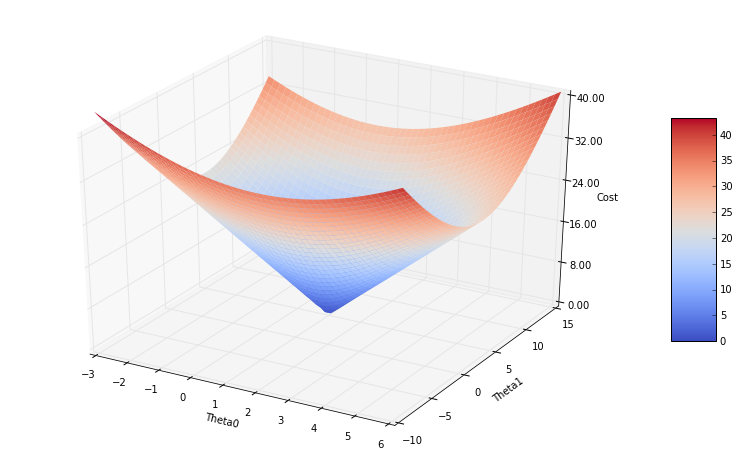

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.core.pylabtools import figsize

N = 50
X = 0.25 * np.random.randn(N)
Y = 2 + (2 * X) + (0.002 * np.random.randn(N))

divs = 50
theta0 = np.linspace(-3, 6, divs)
theta1 = np.linspace(-9, 15, divs)
Z = np.empty((divs, divs))
for i in range(divs):
    for j in range(divs):
        Z[i,j] = np.linalg.norm(Y - (theta0[i] + (theta1[j]*X)))

figsize(14,8)
fig = pl.figure()
ax = fig.gca(projection='3d')
A, B = np.meshgrid(theta0, theta1)
min_theta0, min_theta1 = np.unravel_index(np.argmin(Z), (divs,divs))
surf = ax.plot_surface(A, B, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, vmin=0)

ax.set_zlim(0, 40)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.w_zaxis.set_major_locator(LinearLocator(6))
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
fig.colorbar(surf, shrink=0.5, aspect=5)

pl.show()

## Cost-Sensitive Classification

## Curse of Dimensionality
This phrase describes the phenomenon whereby as the number of features, or dimensions, in a model increases, the amount of data required to achieve the same power in the model increases exponentially. There's a great explanation of it <a href="https://www.opendatascience.com/blog/curse-of-dimensionality-explained/">here</a>.

## Deep Learning

## F1 Score
This is a metric used to evaluate a binary classifier by taking both <a href="#Precision">precision</a> and <a href="#Recall">recall</a> into account. This is particularly important when there is a <a href="#Class-Imbalance-Problem">class imbalance problem</a> such that you could get very high recall by always predicting the majority class. The F1 score is defined as follows:

In [4]:
# Suppose you have precision of 90%
precision = 0.9
# But your recall is only 50%
recall = 0.5
# Get the F1 score
f1 = 2 * ((precision * recall) / (precision + recall))
print(f1)

0.642857142857


## Gaussian Processes
Gaussian Processes (GPs) provide an alternative approach to regression problems. In the simple <a href="#Linear-Regression">linear regression</a> setting, we have a dependent variable y that we assume can be modeled as a function of an independent variable x, i.e. $ y = f(x) + \epsilon $ (where $ \epsilon $ is the irreducible error) but we assume further that the function $ f $ defines a linear relationship and so we are trying to find the parameters $ \theta_0 $ and $ \theta_1 $ which define the intercept and slope of the line respectively, i.e. $ y = \theta_0 + \theta_1x + \epsilon $. Bayesian linear regression provides a probabilistic approach to this by finding a distribution over the parameters that gets updated whenever new data points are observed. The GP approach, in contrast, is a <a href="#Non-parametric-Model">*non-parametric*</a> approach, in that it finds a distribution over the possible **functions** $ f(x) $ that are consistent with the observed data. As with all Bayesian methods it begins with a prior distribution and updates this as data points are observed, producing the posterior distribution.

The approach uses a <a href="#Kernel-function">kernel function</a> to create a covariance matrix that restricts the set of functions under consideration.

The code presented here to illustrate Gaussian Processes borrows heavily from two main sources:
1. <a href="http://www.cs.ubc.ca/~nando/540-2013/lectures.html">Nando de Freitas' UBC Machine Learning lectures</a> (code for GPs can be found <a href="http://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py">here</a>) and 
2. the <a href="https://github.com/probml/pmtk3">PMTK3 toolkit</a>, which is the companion code to <a href="https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020/">Kevin Murphy's Machine Learning: A Probabilistic Perspective</a>.

Below we define the points at which our functions will be evaluated, 50 evenly spaced points between -5 and 5. We also define the kernel function which uses the Squared Exponential, a.k.a Gaussian, a.k.a. Radial Basis Function kernel. It calculates the squared distance between points and converts it into a measure of similarity, controlled by a tuning parameter. Note that we are assuming a mean of 0 for our prior.

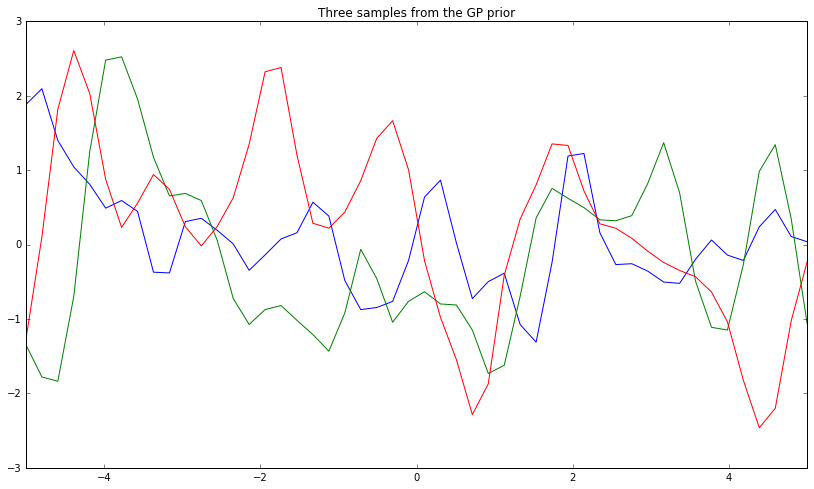

In [5]:
# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior');

Now we'll observe some data. We generate the output at 5 training points, calculate the conditional probability of the outputs at our test points given the input at our test points, the input at our training points, and the output at our training points. Then we sample from the posterior and plot it.

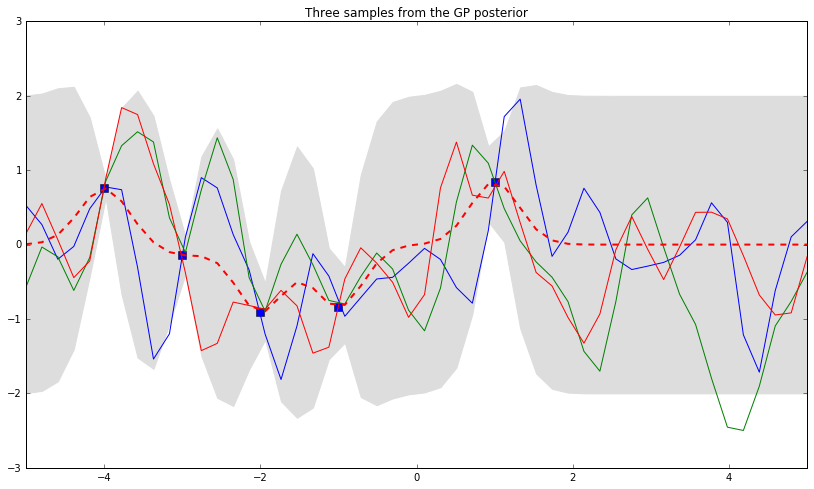

In [6]:
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior');

## Gibbs Sampling

## Gradient Descent

## Kernel Function
A function that given two values returns a measure of the similarity between them.

## Kernel Machines
This is an umbrella term for a class of ML algorithm that uses a <a href="#Kernel-Function">kernel function</a> to classify examples. <a href="#Support-Vector-Machine-(SVM)">Support Vector Machines</a> are a widely-used implementation of this idea.

## Kernel Trick
When a kernel function can be substituted for an inner product calculation resulting in much faster computation, this is known as the kernel trick.

## Latent Dirichlet Allocation
Latent Dirichlet Allocation is an approach to <a href="#Topic-Modeling">topic modeling</a> that generates topics based on word frequency from a set of documents. It is an extension of the <a href="#Bag-of-words">bag-of-words</a> model.

## Latent Semantic Analysis
Latent Semantic Analysis (LSA) is a mathematical method that tries to bring out latent relationships within a collection of documents. Rather than looking at each document isolated from the others it looks at all the documents as a whole and the terms within them to identify relationships.

The following is an attempt to reproduce the example from http://lsa.colorado.edu/papers/dp1.LSAintro.pdf

In [7]:
import re
texts = {
  "c1": "Human machine interface for ABC computer applications",
  "c2": "A survey of user opinion of computer system response time",
  "c3": "The EPS user interface management system",
  "c4": "System and human system engineering testing of EPS",
  "c5": "Relation of user perceived response time to error measurement",
  "m1": "The generation of random, binary, ordered trees",
  "m2": "The intersection graph of paths in trees",
  "m3": "Graph minors IV: Widths of trees and well-quasi-ordering",
  "m4": "Graph minors: A survey"
}

all_words = {}
for k in texts:
    all_words[k] = [re.sub('[\W]+', '', word.lower()) for word in texts[k].split() if word.lower() not in ["the","and","of","a","in","to","for"]]
import numpy as np
import pandas as pd
keys = sorted(all_words.keys())
words = []
for i,j in enumerate(keys):
    for w in all_words[j]:
        if w in words:
            continue
        for k in keys[i+1:]:
            if w in all_words[k]:
                words.append(w)
                break

word_counts = {}
from collections import OrderedDict
for key in texts:
    word_counts[key] = [texts[key].lower().count(w) for w in words]
word_counts_ordered = OrderedDict(sorted(word_counts.items(), key=lambda t: t[0]))
count_matrix = pd.DataFrame(np.array(word_counts_ordered.values()).T, index = words, columns=keys)
count_matrix

,c1,c2,c3,c4,c5,m1,m2,m3,m4
human,1,0,0,1,0,0,0,0,0
interface,1,0,1,0,0,0,0,0,0
computer,1,1,0,0,0,0,0,0,0
survey,0,1,0,0,0,0,0,0,1
user,0,1,1,0,1,0,0,0,0
system,0,1,1,2,0,0,0,0,0
response,0,1,0,0,1,0,0,0,0
time,0,1,0,0,1,0,0,0,0
eps,0,0,1,1,0,0,0,0,0
trees,0,0,0,0,0,1,1,1,0


In [8]:
# Show the correlation between "human" and "user"
np.corrcoef(count_matrix.values[0], count_matrix.values[4])

array([[ 1.        , -0.37796447],
       [-0.37796447,  1.        ]])

In [9]:
# Use singular value decomposition to decompose the count matrix
# into the product of three matrices.
U, s, V = np.linalg.svd(count_matrix.values, full_matrices=False)
S = np.diag(s[:2])
reduced = np.dot(U[:,:2], np.dot(S,V[:,:2].T))
count_matrix_reduced = pd.DataFrame(reduced, index = words, columns=keys)

To be completed...

## Linear Regression

Assuming our outcome variable can be modeled as a linear function of one or more predictors, linear regression is about finding the parameters of that function, given observed data, and using them to make predictions on new data. In simple linear regression we model the outcome y as a function of a single predictor x. In particular, the function is defined by the line $ y = \theta_0 + \theta_1x + \epsilon $ where $ \theta_0 $ is the intercept, $ \theta_1 $ is the slope of the line, and $ \epsilon $ is the irreducible error. For a given set of (x,y) observations, we want to find the line that best fits this data.

The "ordinary least squares" (OLS) fit is the line that minimizes the sum of the squared distances between observed data and predicted values, i.e. it minimizes the Residual Sum of Squares (RSS):

$ \underset{\theta}{\arg\min} \sum_{i=1}^n(y_i - \hat{y_i})^2 $

where

$\hat{y_i} = \theta_0 + \theta_1x_i$

is the predicted outcome for the ith observation. We can write the actual value of the ith observation as:

$y_i = \theta_0 + \theta_1x_i + \epsilon_i$

where $\epsilon_i$ is the residual, or error, we get for the ith observation, i.e. the difference between the predicted value $\hat{y_i}$ and the actual value $y_i$.

The slope of the OLS line is the correlation between outcome values and predictor values, multiplied by the ratio of their standard deviations. The line goes through the point (mean(x), mean(y)), and once we know the slope of a line and a single point it goes through we can find the intercept by working back along the slope from that point: $\theta_0 = \bar{y} - \theta_1\bar{x}$

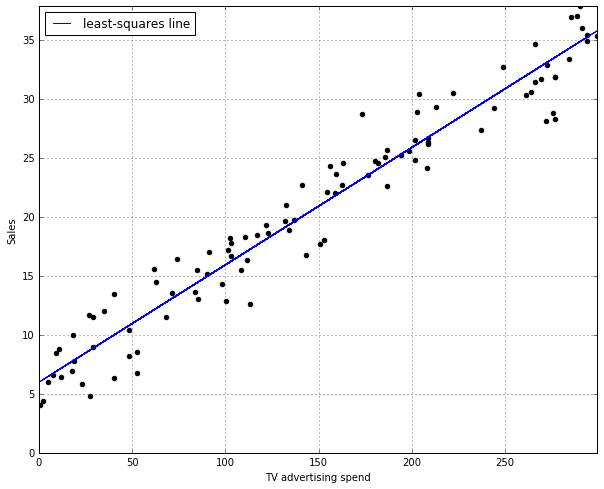

In [10]:
# Generate 100 random numbers between 0 and 300
N = 100
X = np.random.uniform(0, 300, N)
# Generate our outcome variables as a linear function of X plus some error
Y = 6 + (0.1 * X) + (2 * np.random.randn(N))
figsize(10, 8)
fig = pl.figure()
ax = pl.subplot(111)
# The slope of the OLS line can be calculated from the covariand of X and Y
ls_coef_ = np.cov(X, Y)[0, 1] / np.var(X)
# Calculate the intercept from mean(X), mean(Y) and the slope
ls_intercept = Y.mean() - ls_coef_*X.mean()
pl.scatter(X, Y, c="k")
pl.xlabel("TV advertising spend")
pl.ylabel("Sales")
pl.plot(X, ls_coef_ * X + ls_intercept, label="least-squares line")
pl.xlim(min(0, X.min()), X.max())
pl.ylim(min(0, Y.min()), Y.max())
pl.grid(True)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
pl.legend(loc="upper left");

In the multiple regression scenario, where we have p predictors, we model the outcome as:

$ \hat{y_i} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_px_p $

In this setting it's not quite as straight-forward to derive the coefficients as in the single predictor case. Instead, we need to use calculus and get the partial derivative of our cost function with respect to each parameter and solve for that parameter when setting its derivative to 0.

## Markov Chain Monte Carlo (MCMC)

## Neural Network

## Non-convex Optimization Problem

## Non-parametric Model
The term non-parametric is a bit of a misnomer here because this type of model, far from having no parameters, has in fact infinitely many parameters.

## Online Learning

## Overfitting

## Pooling

## Precision
Used as a metric for evaluating binary classifiers, precision expresses the number of true positive examples as a fraction of all examples that were classified as positive. On its own this metric is of limited use and is usually used in conjunction with the <a href="#Recall">recall</a> metric, in particular to obtain an <a href="#F1-Score">F1 score</a>.

## Probabilistic Programming

## Random Forest

## Rectified Linear Unit (ReLU)
Uses a rectifier, which is a function mapping x to max(0,x). Often used as the activation function in neural networks.

## Receiver Operating Characteristic (ROC) Curve

## Regression

## Sigmoid function

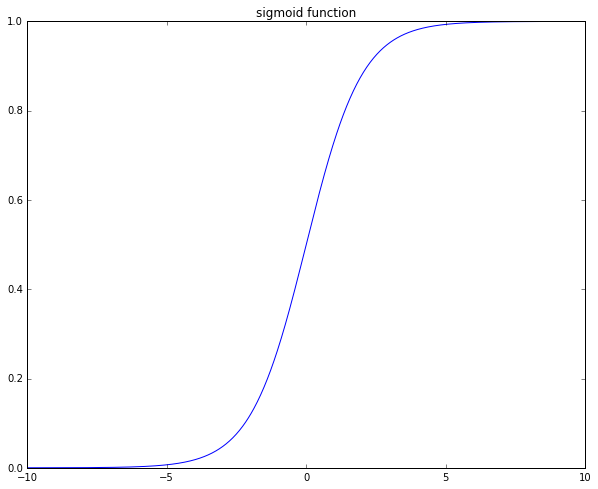

In [11]:
e = np.exp(1)
x = np.linspace(-10, 10, 1000)
y = e**x / (e**x + 1)
pl.plot(x, y)
pl.title('sigmoid function');

## Singular Value Decomposition

## SoftMax
The SoftMax function maps real-valued scores to a discrete probability distribution.

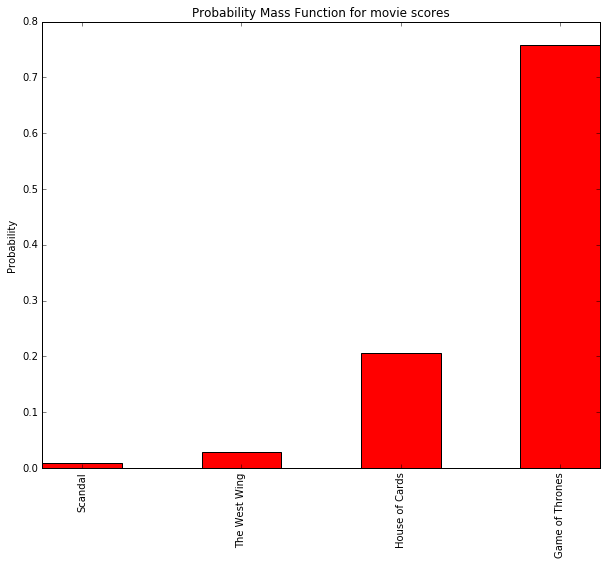

In [12]:
def softmax(w, t = 1.0):
    e = np.exp(w / t)
    dist = e / np.sum(e)
    return dist

scores = {"House of Cards": 23.0, "Scandal": 19.8, "The West Wing": 21.0, "Game of Thrones": 24.3}
arr = np.array(scores.values())
dist = softmax(arr)
fig, ax = pl.subplots()
ind = np.arange(len(scores.keys()))
width = 0.5
rects = ax.bar(ind, dist, width, color='r')
ax.set_ylabel('Probability')
ax.set_title('Probability Mass Function for movie scores')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(scores.keys(), rotation=90)
pl.show()

## Stochastic Gradient Descent

## Supervised Learning

## Support Vector Machine (SVM)
An SVM is a type of "large-margin classifier"

## Transfer Learning

## Unsupervised Learning

## Wishart Distribution

In [13]:
import uuid
from IPython.display import HTML

output = """
  <link rel="stylesheet" type="text/css" href="listnav.css"/>
  <script type="text/javascript" src="jquery-listnav.min.js"></script>
  <script type="text/javascript">
    (function () {{
        var dt = 100;
        var toc = "";
        var level = 0;
        var levels = {}
        $('#toc').html('');

        $("h2").each(function(i){
          if (this.id=='tocheading'){return;}
        
          titleText = this.innerHTML;
           openLevel = this.tagName[1];

           if (levels[openLevel]){
             levels[openLevel] += 1;
           } else{
             levels[openLevel] = 1;
           }

           if (openLevel > level) {
             toc += (new Array(openLevel - level + 1)).join('<ul class="toc">');
           } else if (openLevel < level) {
             toc += (new Array(level - openLevel + 1)).join("</ul>");
             for (i=level;i>openLevel;i--){levels[i]=0;}
           }

           level = parseInt(openLevel);

           if (this.id==''){this.id = this.innerHTML.replace(/ /g,"-")}
           var anchor = this.id;
           toc += '<li><a href="#' + anchor + '">' +  titleText + '</a></li>';
        });

      if (level) {
        toc += (new Array(level + 1)).join("</ul>");
      }

      $('#toc').append(toc);
      function navify() {{
        if ( $().listnav === undefined ) {{
          console.log("no listnav");
          dt = dt * 1.5; // slow-down checks for listnav as time goes on;
          setTimeout(navify, dt);
          return;
        }}

        $('#toc ul ul').listnav();
        $('.listNav .ln-letters .a').trigger('click');
      }}
      $(document).ready(navify)
    }})();
  </script>
    """
HTML(output)